# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [2]:
def norm_l0(matrix):
    # Norma l0: simplemente cuenta la cantidad de elementos no cero
    norm = np.count_nonzero(matrix, axis=1)
    return norm

def norm_l1(matrix):
    # Norma l1: toma el valor absoluto de cada elemento, los suma
    norm = np.sum(np.abs(matrix), axis=1)
    return norm

def norm_l2(matrix):
    # Norma l2: toma el cuadrado de cada elemento, los suma y toma la raíz cuadrada
    norm = np.sqrt(np.sum(np.square(matrix), axis=1))
    return norm

def norm_l_inf(matrix):
    # Norma l_inf: encuentra el valor máximo absoluto en cada vector
    norm = np.max(np.abs(matrix), axis=1)
    return norm

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)

Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [3]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

def calculate_metrics(truth, prediction):
    TP = np.sum((truth == 1) & (prediction == 1))
    TN = np.sum((truth == 0) & (prediction == 0))
    FP = np.sum((truth == 0) & (prediction == 1))
    FN = np.sum((truth == 1) & (prediction == 0))

    # calculamos las métricas
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return precision, recall, accuracy

precision, recall, accuracy = calculate_metrics(truth, prediction)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)



Precision: 0.5
Recall: 0.5
Accuracy: 0.4


### Tercer ejercicio

Crear una función que separe los datos en train-validation-test. Debe recibir de parametros:

- X: Array o Dataframe que contiene los datos de entrada del sistema.
- y: Array o Dataframe que contiene la(s) variable(s) target del problema.
- train_percentage: _float_ el porcentaje de training.
- test_percentage: _float_ el porcentaje de testing.
- val_percentage: _float_ el porcentaje de validación.
- shuffle: _bool_ determina si el split debe hacerse de manera random o no.

Hints:

* Usar Indexing y slicing
* Usar np.random.[...]

In [4]:
def split(X_input,
          Y_input,
          train_size=0.7,
          val_size=0.15,
          test_size=0.15,
          random_state=42,
          shuffle=True):

    # Establecemos la semilla del generador de números aleatorios
    np.random.seed(random_state)

    # Convertimos los datos a numpy arrays en caso de que no lo sean
    X = np.array(X_input)
    y = np.array(Y_input)

    # Creamos los índices y los mezclamos si shuffle es True
    indexes = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(indexes)

    # Calculamos los tamaños de cada conjunto
    train_end = int(X.shape[0] * train_size)
    val_end = int(X.shape[0] * (train_size + val_size))

    # Creamos los índices para cada conjunto usando slicing
    train_indexes = indexes[:train_end]
    val_indexes = indexes[train_end:val_end]
    test_indexes = indexes[val_end:]

    # Usamos los índices para obtener los conjuntos de datos
    X_train, y_train = X[train_indexes], y[train_indexes]
    X_val, y_val = X[val_indexes], y[val_indexes]
    X_test, y_test = X[test_indexes], y[test_indexes]

    return X_train, X_val, X_test, y_train, y_val, y_test

## Segunda parte (Aprendizaje Supervisado)

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_dataset: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [5]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Cuarto ejercicio

Utilizando la funcion `generate_dataset` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Analice como varía el problema cuando se generan múltiples veces el dataset con un valor de _noise_ fijo.

**- Qué pasa con los coeficientes de las variables no informativas?**

  Los coeficientes de las variables no informativas tienden a cero ya que estas no aportan informacion suficiente a la prediccion.

**- La regresión se ve afectada por estas variables?**
  Sí, la regresión se ve afectada por estas variables. Ya que la regresión lineal trata de encontrar alguna relación entre estas características y la variable objetivo. Esto puede llevar a un sobreajuste, donde el modelo es demasiado complejo y ajusta el ruido en los datos, en lugar de encontrar las verdaderas relaciones subyacentes.

**- Simule el mismo dataset 100 veces y analice los coeficientes, que se puede notar?**

  Los valores de los coeficientes se mantienen ya que el valor de random_state permanece el mismo (42) durante todas la iteraciones.


In [6]:
from sklearn.linear_model import LinearRegression
n_simulations = 100
coefs = []

for i in range(n_simulations):
    data = generate_dataset(n_samples=1000,
                            n_features=10,
                            n_informative=5,
                            n_targets=1,
                            noise=20.0,
                            random_state=i,  # cambiar el random_state en cada iteración
                            output='dataframe')

    X = data.drop('target', axis=1)
    y = data['target']

    reg = LinearRegression().fit(X, y)
    print(i+1,"- ",reg.coef_)
    coefs.append(reg.coef_)


1 -  [51.6290165   0.94125122 73.23697912 -0.26345366  9.63530611 12.99184966
 -0.25928401 -0.87711945  0.77360592 39.2005067 ]
2 -  [-0.25773053 26.78004067  3.28455554 -0.6414864   0.99229893 86.36888491
  0.49101392  0.40788354 91.96268066 12.07780202]
3 -  [-1.10026742 -0.11897469 16.20528136 27.76011759 12.23997935 54.96500931
 -0.34385521 -0.37639067 -0.34937344 20.09372223]
4 -  [-2.38823930e-02  3.94002430e+01 -9.06283188e-01  7.20904330e-02
 -1.06558807e+00 -7.71672324e-01  4.87280556e+01  4.62744786e+01
  3.94771672e+01  2.77942593e+01]
5 -  [ 0.18322991 -0.62472704 49.86775772 55.71332916 60.56302865 31.67181378
  0.49333197  2.77671476 -0.23825623  0.24097984]
6 -  [33.80021545 37.39893161  0.95129071 50.32698147  0.26639861 -0.89243571
 -1.19799685 -1.0257293  33.49855312 90.14529444]
7 -  [87.04962281 24.3982644  88.02929639  0.86610185  0.43247047  0.28717428
 93.56280194 -0.66127967 26.17333027  0.34316957]
8 -  [-0.40930085  0.53757986 77.34451715  0.44381147 -0.354049

### Quinto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

Normal - Low Noise - Few Outliers - Linear Regression: Mean Squared Error = 114.00857184897541


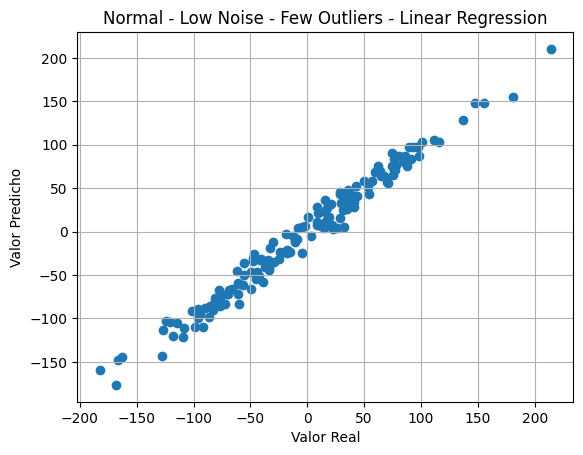

Normal - Low Noise - Few Outliers - Huber Regressor: Mean Squared Error = 115.0380378261455


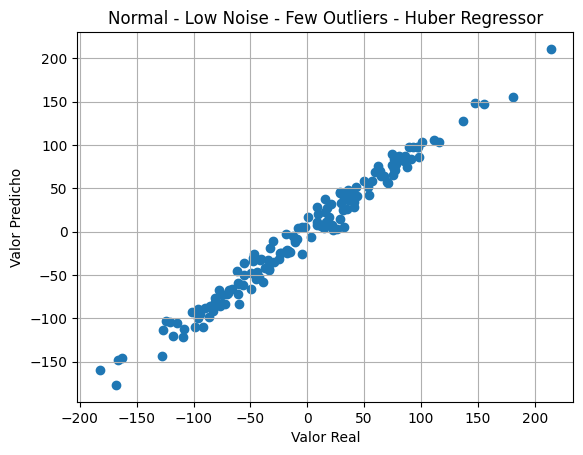

Normal - Low Noise - Few Outliers - Elastic Net CV: Mean Squared Error = 133.38736116494584


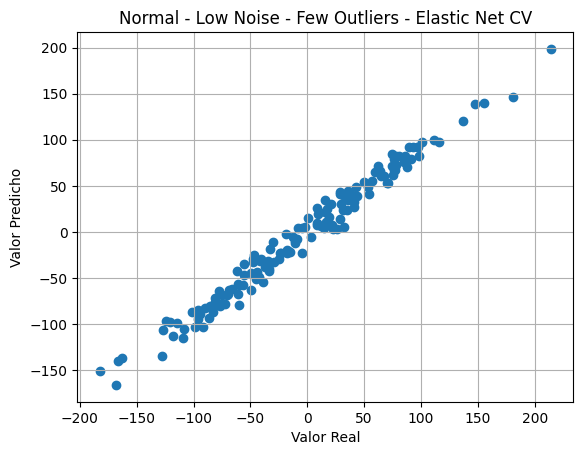

High Noise - Few Outliers - Linear Regression: Mean Squared Error = 5586.420020599798


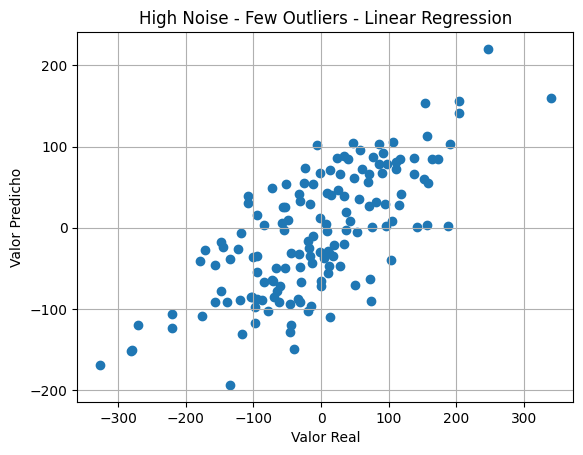

High Noise - Few Outliers - Huber Regressor: Mean Squared Error = 5636.867944423234


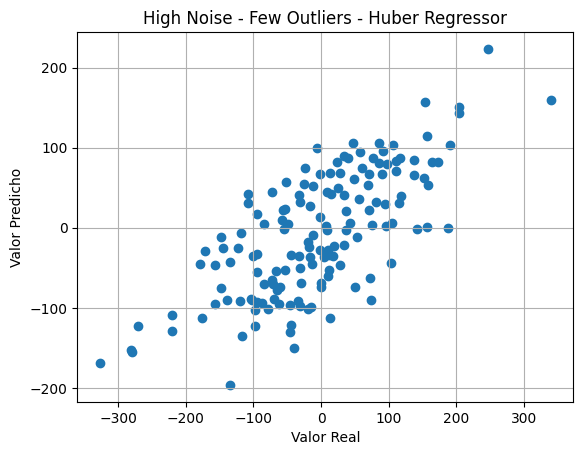

High Noise - Few Outliers - Elastic Net CV: Mean Squared Error = 5616.980796747835


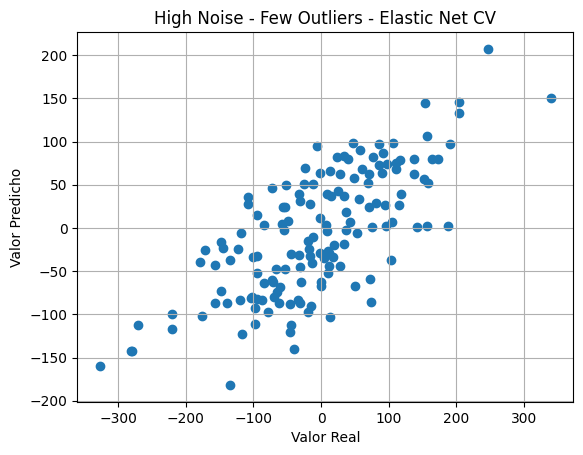

Normal - Low Noise - Many Outliers - Linear Regression: Mean Squared Error = 128.5484728426756


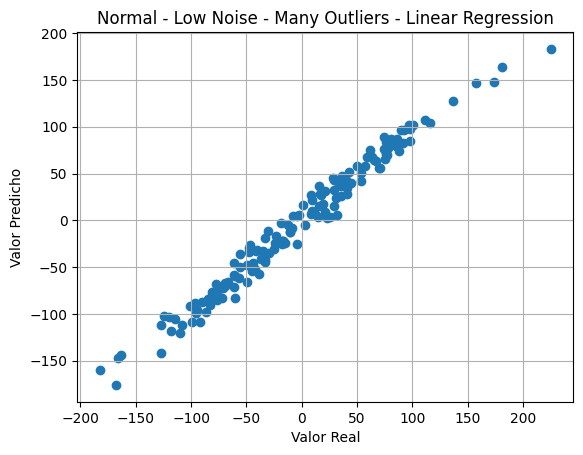

Normal - Low Noise - Many Outliers - Huber Regressor: Mean Squared Error = 129.35473463714254


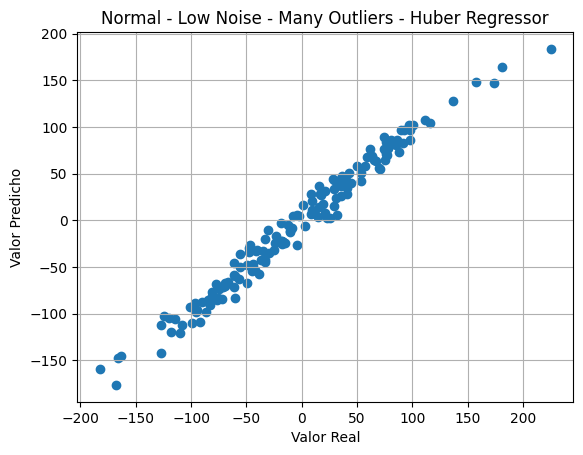

Normal - Low Noise - Many Outliers - Elastic Net CV: Mean Squared Error = 157.24146616585514


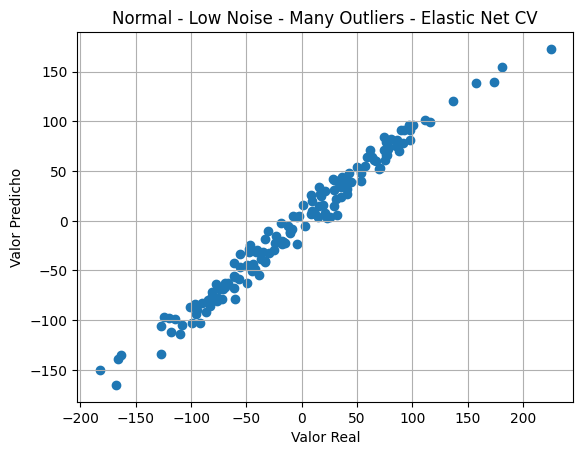

High Noise - Many Outliers - Linear Regression: Mean Squared Error = 5484.2926876812735


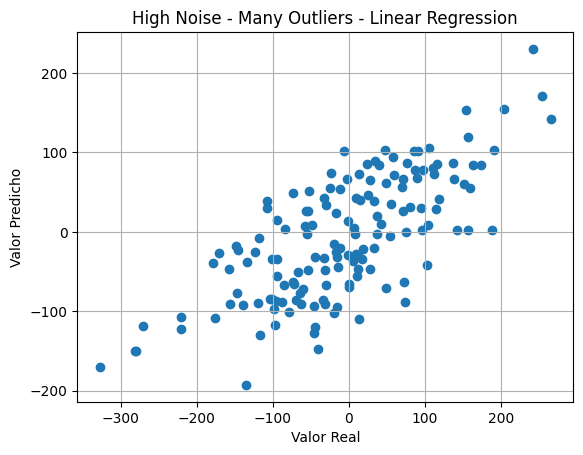

High Noise - Many Outliers - Huber Regressor: Mean Squared Error = 5535.95165162118


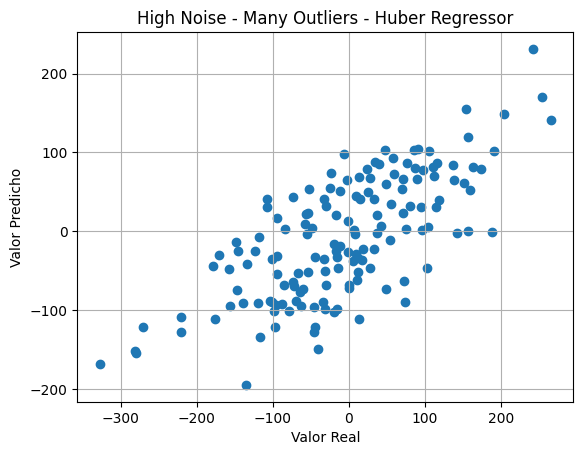

High Noise - Many Outliers - Elastic Net CV: Mean Squared Error = 5509.067119425453


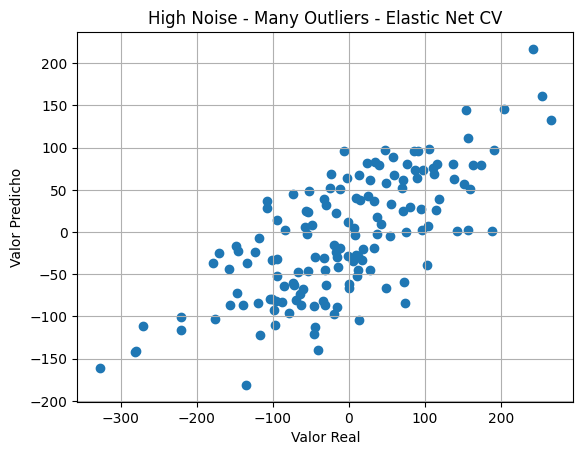

In [7]:
from sklearn.linear_model import HuberRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error

low_noise_few_outliers_dataset = generate_dataset(n_samples=1000,
                            n_features=10,
                            n_informative=5,
                            n_targets=1,
                            noise=10.0,
                            random_state=42,
                            output='dataframe')


high_noise_few_outliers_dataset = generate_dataset(n_samples=1000,
                            n_features=10,
                            n_informative=5,
                            n_targets=1,
                            noise=70.0,
                            random_state=42,
                            output='dataframe')

low_noise_many_outliers = generate_outliers(
    low_noise_few_outliers_dataset,
    extreme_outlier=False,
    percentage=0.2
)

high_noise_many_outliers = generate_outliers(
    high_noise_few_outliers_dataset,
    extreme_outlier=False,
    percentage=0.2
)

datasets = [
    ("Normal - Low Noise - Few Outliers", low_noise_few_outliers_dataset),
    ("High Noise - Few Outliers", high_noise_few_outliers_dataset),
    ("Normal - Low Noise - Many Outliers", low_noise_many_outliers),
    ("High Noise - Many Outliers", high_noise_many_outliers)
]

regressors = [
    ("Linear Regression", LinearRegression()),
    ("Huber Regressor", HuberRegressor()),
    ("Elastic Net CV", ElasticNetCV())
]

for dataset_name, dataset in datasets:
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    X_train, X_val, X_test, y_train, y_val, y_test = split(X, y, test_size=0.2, random_state=42)



    for regressor_name, regressor in regressors:
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f"{dataset_name} - {regressor_name}: Mean Squared Error = {mse}")

        # Graficar los resultados de la regresión
        plt.scatter(y_test, y_pred)
        plt.xlabel("Valor Real")
        plt.ylabel("Valor Predicho")
        plt.grid()
        plt.title(f"{dataset_name} - {regressor_name}")
        plt.show()

## Tercera Parte (No supervisado)

### Sexto y Septimo Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 6) y $k=10$ (ej 7). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 17

In [9]:
PATH_DATASET = os.getcwd()+"\data\HAR_Dataset\\train"

In [10]:
print(PATH_DATASET)
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

g:\UBA\1 bimestre\Intro IA\TP Integrador\data\HAR_Dataset\train


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [12]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

Número de componentes para el 80% de la varianza explicada: 26


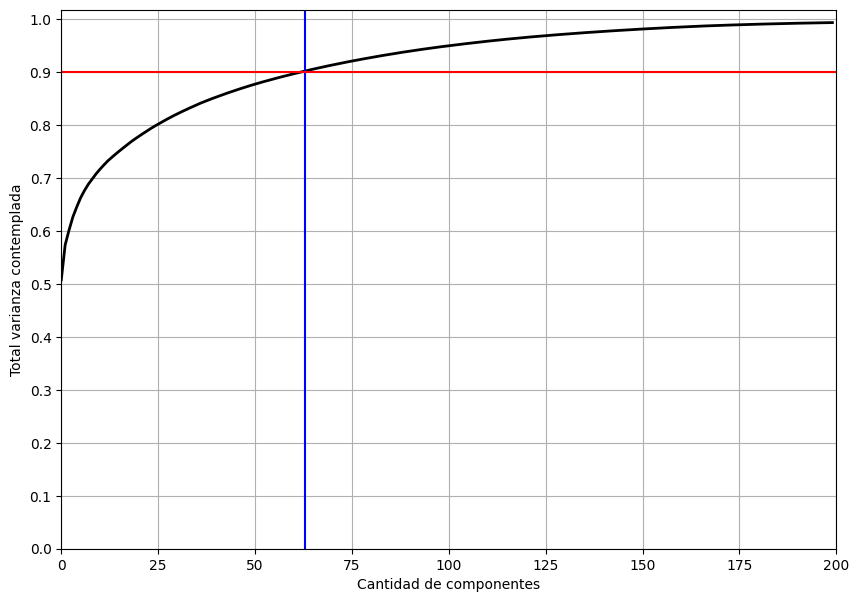

In [13]:
pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)

# Obtener la varianza explicada
variance_explained = pca_2.explained_variance_ratio_

# Calcular la varianza explicada acumulada
cumulative_variance_explained = np.cumsum(variance_explained)

# Encontrar el número de componentes necesarias para el 80% de la varianza explicada
n_components_80_var = np.argmax(cumulative_variance_explained >= 0.8) + 1

print(f"Número de componentes para el 80% de la varianza explicada: {n_components_80_var}")

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.grid()
plt.show();

C:\Users\Carlos\AppData\Local\Temp\ipykernel_53568\2823303826.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


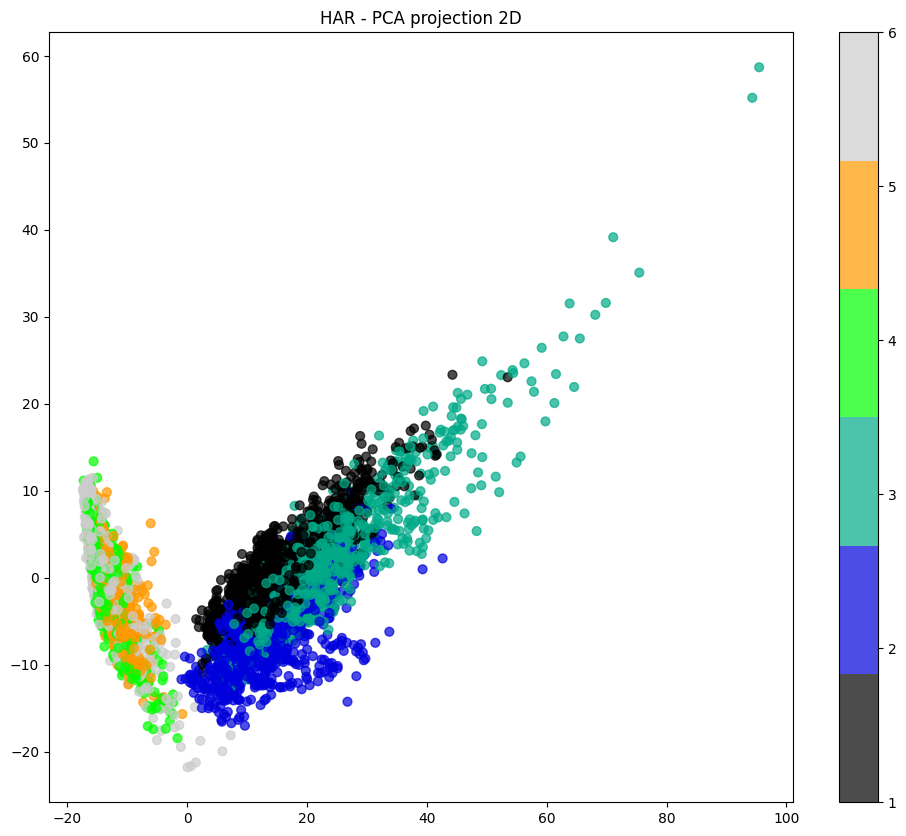

In [14]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False #Evita un warning
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [15]:
kmeans = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

C:\Users\Carlos\AppData\Local\Temp\ipykernel_53568\171183405.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


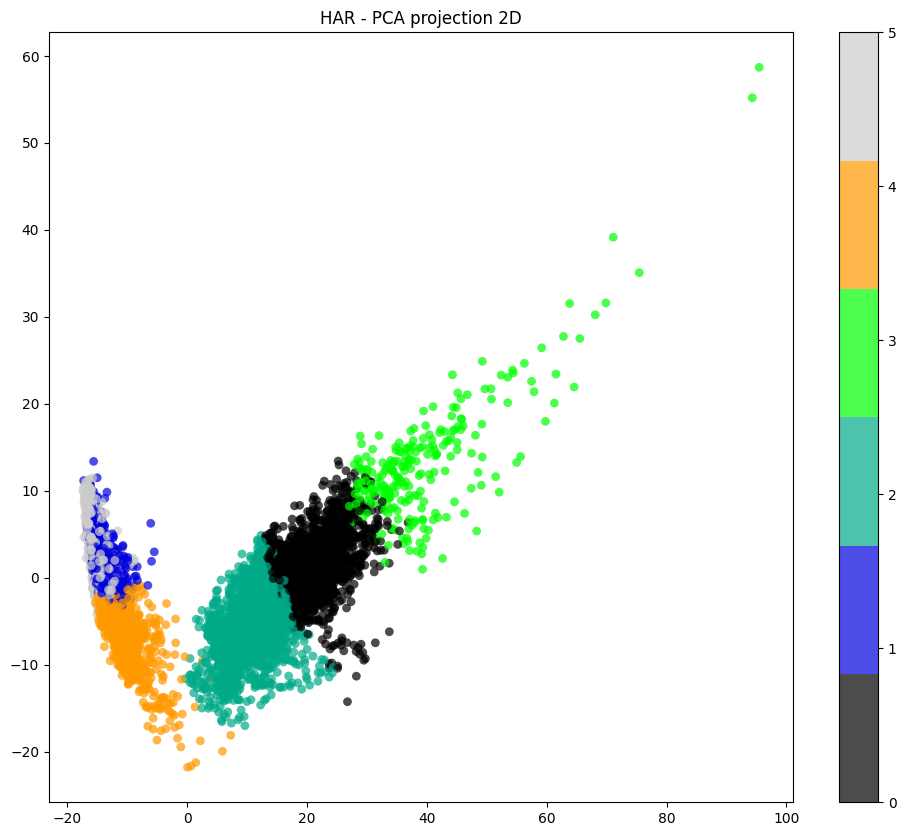

In [16]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [17]:
kmeans_move = KMeans(n_clusters=10, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_

C:\Users\Carlos\AppData\Local\Temp\ipykernel_53568\3276905238.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


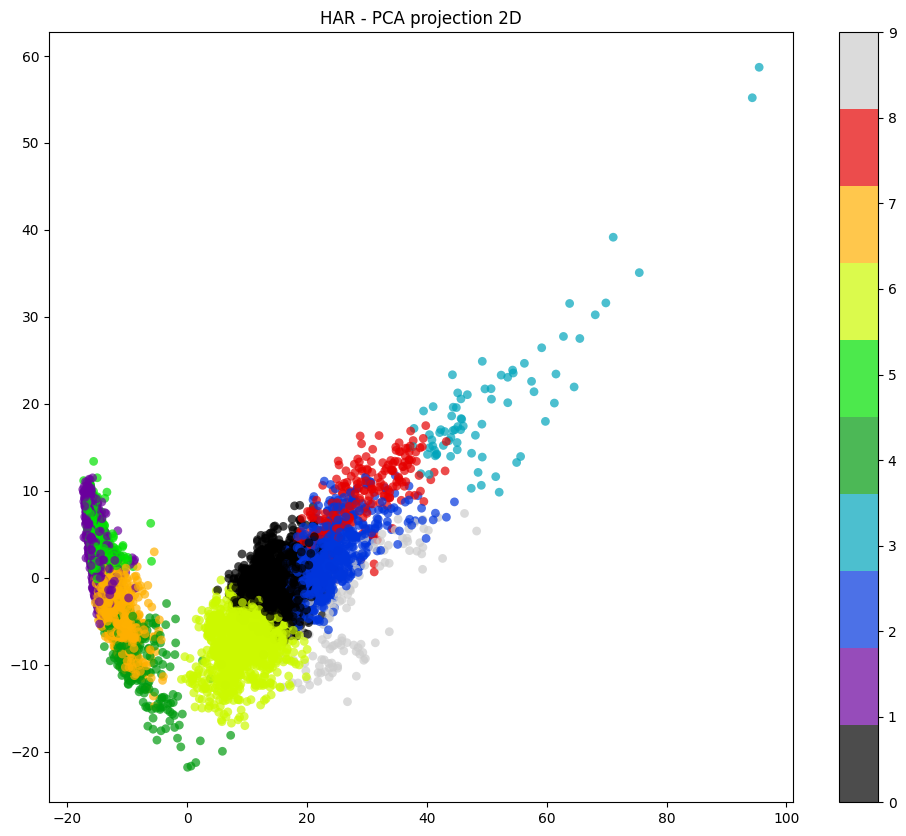

In [18]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

## Ejercicio 8

TBD

## Cuarta Parte

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`